In [5]:
!pip install pandas


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd

file_path = r'C:\Users\sampr\OneDrive\Documents\MoodifyProject\data\data_moods.csv'
  # Replace with your actual file name

# Try reading the file with 'ISO-8859-1' encoding
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first 5 rows
df.head()



,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [7]:
# Display basic info about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              686 non-null    object 
 1   album             686 non-null    object 
 2   artist            686 non-null    object 
 3   id                686 non-null    object 
 4   release_date      686 non-null    object 
 5   popularity        686 non-null    int64  
 6   length            686 non-null    int64  
 7   danceability      686 non-null    float64
 8   acousticness      686 non-null    float64
 9   energy            686 non-null    float64
 10  instrumentalness  686 non-null    float64
 11  liveness          686 non-null    float64
 12  valence           686 non-null    float64
 13  loudness          686 non-null    float64
 14  speechiness       686 non-null    float64
 15  tempo             686 non-null    float64
 16  key               686 non-null    int64  
 1

In [8]:
df.isnull().sum()


name                0
album               0
artist              0
id                  0
release_date        0
popularity          0
length              0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
valence             0
loudness            0
speechiness         0
tempo               0
key                 0
time_signature      0
mood                0
dtype: int64

In [9]:
df.columns


Index(['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'length',
       'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature', 'mood'],
      dtype='object')

In [10]:
# Drop rows with missing values
df.dropna(inplace=True)

# Alternatively, fill missing values (e.g., fill with median or mean)
df['danceability'].fillna(df['danceability'].median(), inplace=True)


C:\Users\sampr\AppData\Local\Temp\ipykernel_28248\3022104685.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['danceability'].fillna(df['danceability'].median(), inplace=True)


In [11]:
df.dtypes  # Check data types of columns


name                 object
album                object
artist               object
id                   object
release_date         object
popularity            int64
length                int64
danceability        float64
acousticness        float64
energy              float64
instrumentalness    float64
liveness            float64
valence             float64
loudness            float64
speechiness         float64
tempo               float64
key                   int64
time_signature        int64
mood                 object
dtype: object

In [12]:
df['release_date'] = pd.to_datetime(df['release_date'], format='mixed', errors='coerce')


creating new features FEATURE ENGINEERING

converting release dates into year and months and then categorizing songs into energy levels ie high, medium, low energy

In [13]:
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month


In [14]:
def classify_energy(row):
    if row['energy'] > 0.7:
        return 'High'
    elif row['energy'] > 0.4:
        return 'Medium'
    else:
        return 'Low'

df['energy_category'] = df.apply(classify_energy, axis=1)
print(df[['energy', 'energy_category']].head())

# Optionally, print counts of each category
print("\nEnergy Category Counts:")
print(df['energy_category'].value_counts())


   energy energy_category
0   0.730            High
1   0.832            High
2   0.139             Low
3   0.438          Medium
4   0.932            High

Energy Category Counts:
energy_category
Low       296
High      250
Medium    140
Name: count, dtype: int64


creating a new column called genre based on audio feature patterns from the datasets: Pop,Rock,Hip-hop,Electronic,Classical and Jazz


In [15]:
def classify_genre(row):
    if row['speechiness'] > 0.33 and row['energy'] > 0.6:
        return 'Hip-Hop'
    elif row['danceability'] > 0.7 and row['valence'] > 0.5:
        return 'Pop'
    elif row['energy'] > 0.7 and row['loudness'] > -6:
        return 'Rock'
    elif row['instrumentalness'] > 0.6 and row['tempo'] > 120:
        return 'Electronic'
    elif row['acousticness'] > 0.8 and row['energy'] < 0.3:
        return 'Classical'
    elif row['instrumentalness'] > 0.4 and 0.4 < row['energy'] < 0.7:
        return 'Jazz'
    else:
        return 'Other'


showing the genre and mood of the first five rows and  the total categorization:

In [27]:
df['genre'] = df.apply(classify_genre, axis=1)
print(df[['name', 'genre', 'mood']].head())
print(df['genre'].value_counts()) 
df.to_csv(r'C:\Users\sampr\OneDrive\Documents\MoodifyProject\data\data_moods.csv', index=False)



                                          name      genre       mood
0                                         1999        Pop      Happy
1                                           23       Rock        Sad
2                                     9 Crimes  Classical        Sad
3                               99 Luftballons      Other      Happy
4  A Boy Brushed Red Living In Black And White       Rock  Energetic
genre
Other         210
Rock          169
Classical     149
Electronic     87
Pop            42
Jazz           27
Hip-Hop         2
Name: count, dtype: int64


In [26]:
df.to_csv(r'C:\Users\sampr\OneDrive\Documents\MoodifyProject\data\data_moods.csv', index=False)


Step 4: Exploratory Data Analysis (EDA)
Before building models or making recommendations, it’s helpful to explore the data visually:

Mood Distribution:
Plot the distribution of moods across songs.

In [23]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


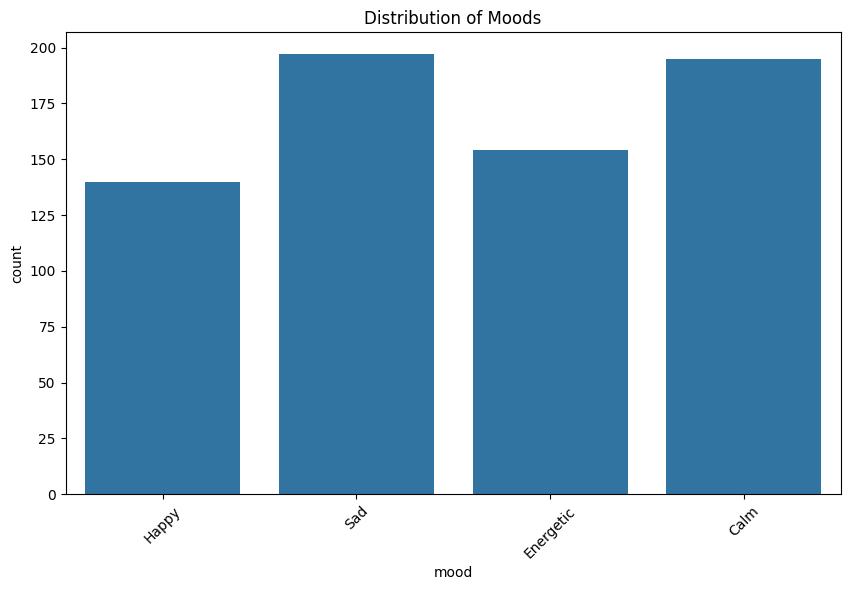

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='mood')
plt.title('Distribution of Moods')
plt.xticks(rotation=45)
plt.show()


Genre vs Mood:
If you want to explore which genres correspond to specific moods, you can plot a heatmap as well a crosstab for genre vs mood :

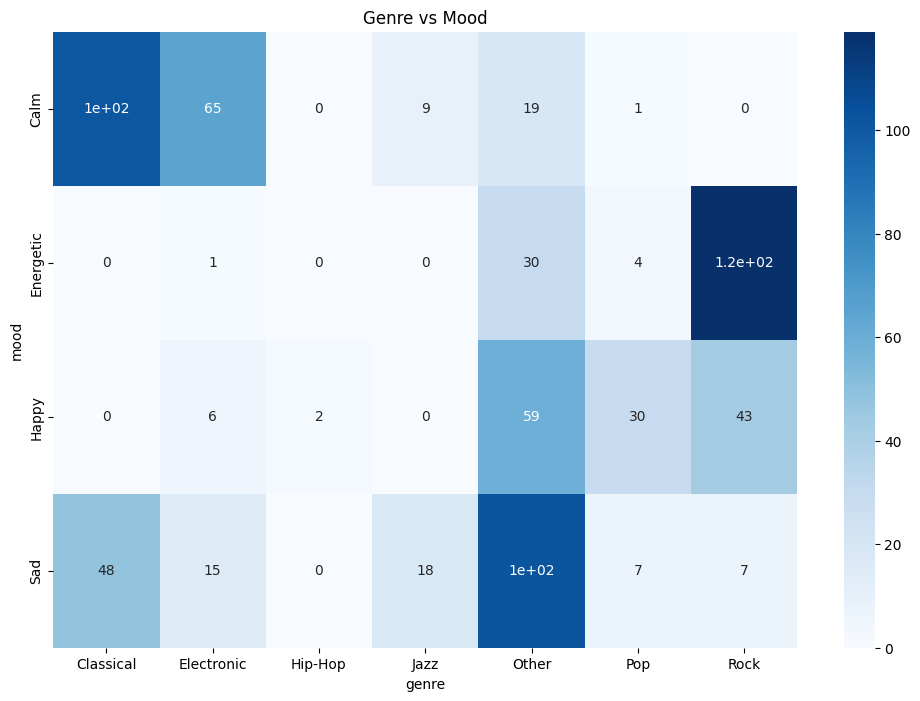

mood        Calm  Energetic  Happy  Sad
genre                                  
Classical    101          0      0   48
Electronic    65          1      6   15
Hip-Hop        0          0      2    0
Jazz           9          0      0   18
Other         19         30     59  102
Pop            1          4     30    7
Rock           0        119     43    7


In [ ]:
genre_mood_pivot = df.pivot_table(index='mood', columns='genre', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(genre_mood_pivot, cmap='Blues', annot=True)
plt.title('Genre vs Mood')
plt.show()
print(pd.crosstab(df['genre'], df['mood']))


Step 5: Genre Classification
Now let’s focus on classifying songs into genres. This can be done with machine learning.

Prepare your features:
Select the relevant features for genre classification, such as danceability, energy, loudness, valence, and others.

In [ ]:
features = df[['danceability', 'energy', 'loudness', 'valence', 'speechiness', 'tempo']]
target = df['genre']  # Assuming you have a column named 'genre'


In [ ]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 1.6 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/11.1 MB 1.6 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.1 MB 1.8 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/11.1 MB 1.6 MB/s eta 0:00:06
   ------- -------------------------------- 2.1/11.1 MB 1.6 MB/s eta 0:00:06
   -------- ------------------------------- 2.4/11.1 MB 1.6 MB/s eta 0:00:06
   -------- ------------------------------- 2.4/11.1 MB 1.6 MB/s eta 0:00:06
   --------- --------------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Check the first few rows
print("🎵 Data Preview:\n", df[['name', 'genre']].head())

🎵 Data Preview:
                                           name      genre
0                                         1999        Pop
1                                           23       Rock
2                                     9 Crimes  Classical
3                               99 Luftballons      Other
4  A Boy Brushed Red Living In Black And White       Rock


visualizing the genre clusters using pca

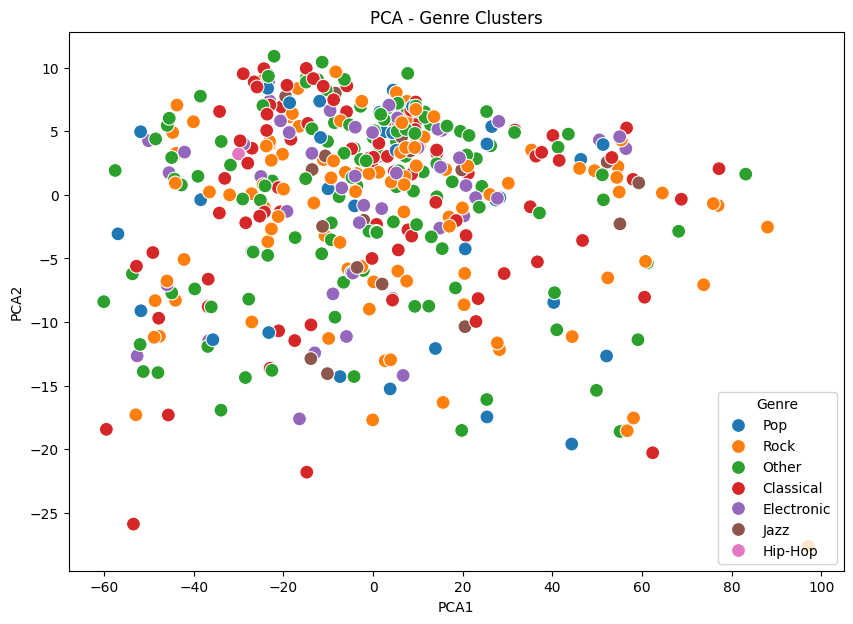

In [ ]:
from sklearn.decomposition import PCA

# Reduce data to 2D for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X_train)

# Create a DataFrame with the 2D components and genre labels
df_pca = pd.DataFrame(components, columns=['PCA1', 'PCA2'])
df_pca['Genre'] = y_train

# Plot the PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Genre', palette='tab10', s=100)
plt.title("PCA - Genre Clusters")
plt.show()


MODELLING

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Check the shape of the train and test sets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (548, 6)
Testing data shape: (138, 6)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model with the training data
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the predictions and actual values
print("\nSample Predictions vs Actual Values:")
print(pd.DataFrame({'Actual Genre': y_test, 'Predicted Genre': y_pred}).head())



Sample Predictions vs Actual Values:
    Actual Genre Predicted Genre
286   Electronic      Electronic
652         Rock            Rock
257         Rock            Rock
336         Rock            Rock
318         Rock            Rock


evaluation of model


Classification Report:
               precision    recall  f1-score   support

   Classical       0.83      0.92      0.87        26
  Electronic       0.78      0.74      0.76        19
     Hip-Hop       0.00      0.00      0.00         1
        Jazz       1.00      0.17      0.29         6
       Other       0.76      0.82      0.79        45
         Pop       1.00      0.80      0.89         5
        Rock       0.97      1.00      0.99        36

    accuracy                           0.84       138
   macro avg       0.76      0.64      0.65       138
weighted avg       0.84      0.84      0.83       138



C:\Users\sampr\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sampr\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sampr\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

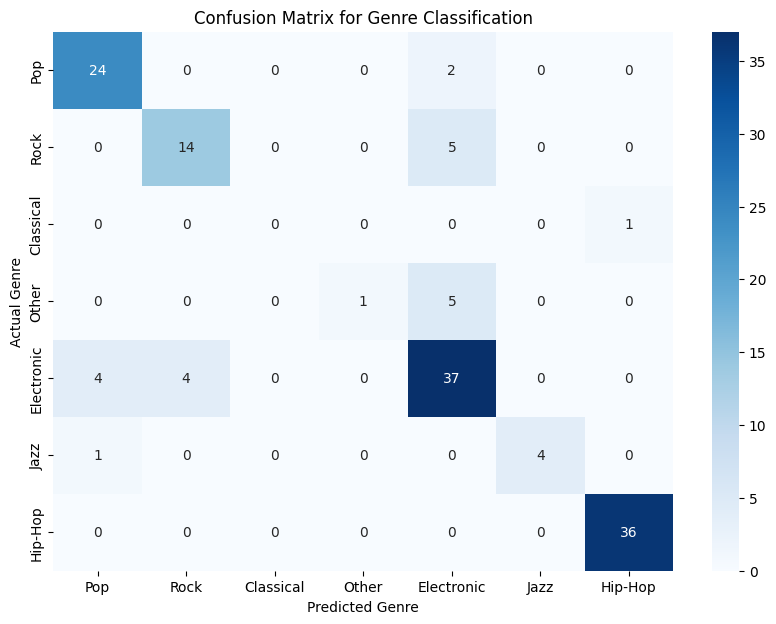

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['genre'].unique(), yticklabels=df['genre'].unique())
plt.title("Confusion Matrix for Genre Classification")
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.show()


to analyze and understand which features contribute to the genre classification we can do:

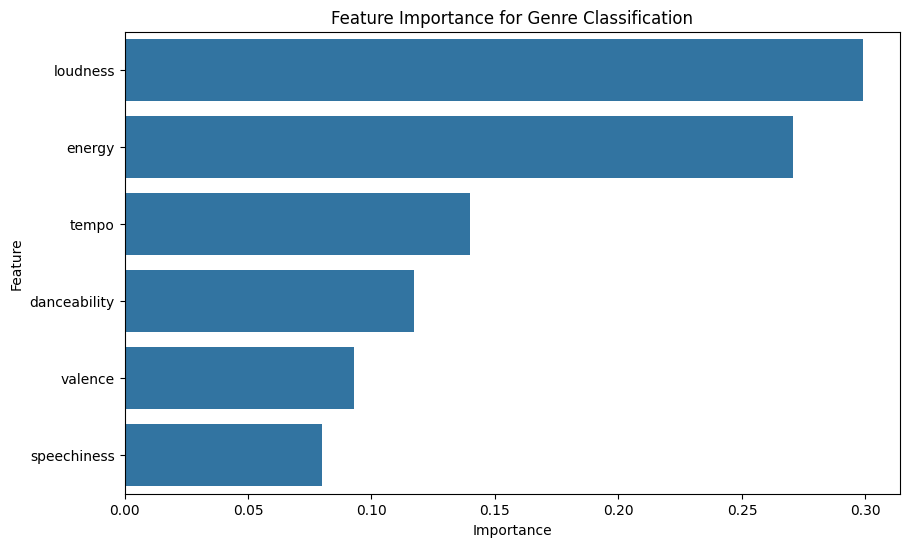

In [ ]:
# Feature importance from Random Forest
feature_importance = clf.feature_importances_

# Create a DataFrame to visualize feature importance
importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance for Genre Classification")
plt.show()


PLAYLIST creation: based on genre and mood

genre based:

In [ ]:
# Function to create a genre-based playlist
def create_genre_playlist(genre):
    return df[df['genre'] == genre]

# Create a Pop playlist (Example)
pop_playlist = create_genre_playlist('Pop')

# Print the first 10 songs: name, album, artist
print("Pop Playlist (First 10 songs):")
print(pop_playlist[['name', 'album', 'artist']].head(10))


Pop Playlist (First 10 songs):
                                                  name  \
0                                                 1999   
25   All or Nothing (feat. Axel EhnstrÃ¶m) - Deluxe...   
58                                     Better Together   
83                                           Butterfly   
99                                         Cold Nights   
109                 Count On You - ATFC's C-thru Remix   
114                                              Crazy   
124                                Dance Little Sister   
149                                 Down On The Corner   
153                                      Driver's Seat   

                                                 album  \
0                                                 1999   
25                               Less is More (Deluxe)   
58                                   In Between Dreams   
83                                    The Gift Of Game   
99                                      

mood based:

In [ ]:
# Function to create a mood-based playlist
def create_mood_playlist(mood):
    return df[df['mood'] == mood]

# Create a Happy playlist (Example)
happy_playlist = create_mood_playlist('Happy')

# Print the first 10 songs: name, album, artist
print("Happy Playlist (First 10 songs):")
print(happy_playlist[['name', 'album', 'artist']].head(10))


Happy Playlist (First 10 songs):
                                                 name  \
0                                                1999   
3                                      99 Luftballons   
7   A Little Less Conversation - JXL Radio Edit Remix   
14                                             Africa   
25  All or Nothing (feat. Axel EhnstrÃ¶m) - Deluxe...   
33                                             Anthem   
35                           Are You Gonna Be My Girl   
52                                     Beautiful Life   
56              Bennie And The Jets - Remastered 2014   
58                                    Better Together   

                                                album            artist  
0                                                1999            Prince  
3                                      99 Luftballons              Nena  
7                     Elvis 75 - Good Rockin' Tonight     Elvis Presley  
14                                         

Moodify Audio Feature Insight
Goal: Provide deeper insights into the features of a song (like tempo, energy, etc.) to make the project more informative.

How to do it:

Allow users to click on a song to view a detailed breakdown of the audio features.

Display graphs for tempo, energy, acousticness, etc., of each song in the playlist

to finally change the csv file df to create the new chnages genre adding

In [28]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\sampr\OneDrive\Documents\MoodifyProject\data\data_moods.csv')

# Check if 'genre' column exists
print(df.columns)  # This will show you all column names



Index(['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'length',
       'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature', 'mood', 'genre'],
      dtype='object')


extras: use spotify's real time data to analyse any long in real time and classify them into genres and moods. Hoever this makes use of libraries like spotipy which make use of spotify API which has many limitations for users to use, even for public tracks. thats why we have used a dataset which has predefined columns based on the tempo and rhythm of each song which help us categorise them easily.

In [ ]:
pip install spotipy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = "56361105697d46ea9e53141a17318a92"
client_secret = "49031fc7415f4aada9fb51244f7a7866"

# Authenticate and set up Spotipy client
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [ ]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy

client_id = '56361105697d46ea9e53141a17318a92'
client_secret = '49031fc7415f4aada9fb51244f7a7866'


auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

# Test with a public call
results = sp.search(q='Shape of You', limit=1, type='track')
print(results)


{'tracks': {'href': 'https://api.spotify.com/v1/search?offset=0&limit=1&query=Shape%20of%20You&type=track', 'limit': 1, 'next': 'https://api.spotify.com/v1/search?offset=1&limit=1&query=Shape%20of%20You&type=track', 'offset': 0, 'previous': None, 'total': 1000, 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6eUKZXaKkcviH0Ku9w2n3V'}, 'href': 'https://api.spotify.com/v1/artists/6eUKZXaKkcviH0Ku9w2n3V', 'id': '6eUKZXaKkcviH0Ku9w2n3V', 'name': 'Ed Sheeran', 'type': 'artist', 'uri': 'spotify:artist:6eUKZXaKkcviH0Ku9w2n3V'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'I

In [ ]:
df['Explicit Track'] = df['Explicit Track'].map({'Yes': 1, 'No': 0})
